In [ ]:
## Fastai Collab Learning with User Metadata

In [ ]:
!pip install -q fastcore
!pip install -q fastai
!pip install -q nbdev

from pathlib import Path

     |████████████████████████████████| 61 kB 178 kB/s 
     |████████████████████████████████| 58 kB 4.0 MB/s 
     |████████████████████████████████| 1.6 MB 44.6 MB/s 


In [ ]:
from fastai.collab import *
from fastai.tabular.all import *

In [ ]:
path = untar_data(URLs.ML_100k)

In [ ]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
!tail /root/.fastai/data/ml-100k/u.item

1673|Mirage (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Mirage%20(1995)|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
1674|Mamma Roma (1962)|01-Jan-1962||http://us.imdb.com/M/title-exact?Mamma%20Roma%20(1962)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
1675|Sunchaser, The (1996)|25-Oct-1996||http://us.imdb.com/M/title-exact?Sunchaser,%20The%20(1996)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
1676|War at Home, The (1996)|01-Jan-1996||http://us.imdb.com/M/title-exact?War%20at%20Home%2C%20The%20%281996%29|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
1677|Sweet Nothing (1995)|20-Sep-1996||http://us.imdb.com/M/title-exact?Sweet%20Nothing%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
1678|Mat' i syn (1997)|06-Feb-1998||http://us.imdb.com/M/title-exact?Mat%27+i+syn+(1997)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
1679|B. Monkey (1998)|06-Feb-1998||http://us.imdb.com/M/title-exact?B%2E+Monkey+(1998)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|1|0|0
1680|Sliding Doors (1998)|01-Jan-1998||http://us.imdb.com/Title?Sliding+Doors

In [ ]:
!head /root/.fastai/data/ml-100k/u.genre

unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6
Documentary|7
Drama|8
Fantasy|9


In [ ]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
users = pd.read_csv(path/'u.user',  delimiter='|', encoding='latin-1',
                     usecols=(0,1, 2, 3, 4), names=('user', 'age','gender', 'occupation', 'zipcode'), header=None)

In [ ]:
users.head(2)

,user,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [ ]:
rat_movies = ratings.merge(movies)
rat_movies_users = rat_movies.merge(users)

In [ ]:
rat_movies_users.zipcode.value_counts()

55414    1103
20009     878
10019     850
22902     832
61820     817
         ... 
15017      20
98405      20
38866      20
02138      20
33763      20
Name: zipcode, Length: 795, dtype: int64

In [ ]:
from nbdev.showdoc import show_doc

Here we are using the user metadata such as gender, occupation and zipcode. How to convert a cont variable such as 'age' into categorical. May be pandas `cut` might help??? 

In [ ]:
class CollabDataLoaders(DataLoaders):
    "Base `DataLoaders` for collaborative filtering."
    @delegates(DataLoaders.from_dblock)
    @classmethod
    def from_df(cls, ratings, valid_pct=0.2, user_name=None, item_name=None, rating_name=None, seed=None, path='.', **kwargs):
        "Create a `DataLoaders` suitable for collaborative filtering from `ratings`."
        user_name   = ifnone(user_name,   ratings.columns[0])
        item_name   = ifnone(item_name,   ratings.columns[1])
        rating_name = ifnone(rating_name, ratings.columns[2])
        cat_names = [user_name,item_name]
        splits = RandomSplitter(valid_pct=valid_pct, seed=seed)(range_of(ratings))
        to = TabularCollab(rat_movies_users, procs=[Categorify], cat_names=['user', 'movie', 'gender', 'occupation', 'zipcode'], 
              y_names=['rating'], y_block=TransformBlock(), splits=splits)
        return to.dataloaders(path=path, **kwargs)

    @classmethod
    def from_csv(cls, csv, **kwargs):
        "Create a `DataLoaders` suitable for collaborative filtering from `csv`."
        return cls.from_df(pd.read_csv(csv), **kwargs)

CollabDataLoaders.from_csv = delegates(to=CollabDataLoaders.from_df)(CollabDataLoaders.from_csv)

In [ ]:
rat_movies_users

,user,movie,rating,timestamp,title,age,gender,occupation,zipcode
0,196,242,3,881250949,Kolya (1996),49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, The (1994)",49,M,writer,55105
...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),48,F,administrator,33763
99996,873,326,4,891392656,G.I. Jane (1997),48,F,administrator,33763
99997,873,348,3,891392577,Desperate Measures (1998),48,F,administrator,33763
99998,873,358,2,891392698,Spawn (1997),48,F,administrator,33763


In [ ]:
dls = CollabDataLoaders.from_df(rat_movies_users)

In [ ]:
x, y = dls.one_batch()

In [ ]:
x.shape, y.shape

(torch.Size([64, 5]), torch.Size([64, 1]))

In [ ]:
get_emb_sz(dls)

[(944, 74), (1652, 101), (3, 3), (22, 9), (796, 67)]

In [ ]:
show_doc(EmbeddingNN)

---

### EmbeddingNN

>      EmbeddingNN (emb_szs, layers, ps:float|list=None, embed_p:float=0.0,
>                   y_range=None, use_bn:bool=True, bn_final:bool=False,
>                   bn_cont:bool=True, act_cls=ReLU(inplace=True),
>                   lin_first:bool=True)

Subclass `TabularModel` to create a NN suitable for collaborative filtering.

In [ ]:
model = EmbeddingNN(get_emb_sz(dls.train_ds, {}),
            [50], y_range=(0, 5.5)).to(x.device)

In [ ]:
out = model(x)

In [ ]:
out.shape

torch.Size([64, 1])

In [ ]:
L(dls.classes)

(#5) ['user','movie','gender','occupation','zipcode']

In [ ]:
learn = collab_learner(dls, y_range=(0, 5.5), use_nn=True, loss_func=MSELossFlat())

In [ ]:
learn.summary()

EmbeddingNN (Input shape: 64 x 5)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 74             
Embedding                                 69856      True      
____________________________________________________________________________
                     64 x 101            
Embedding                                 166852     True      
____________________________________________________________________________
                     64 x 3              
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 9              
Embedding                                 198        True      
____________________________________________________________________________
                     64 x 67             
Embedding                                 53332      True      
Dropout                                                        


SuggestedLRs(valley=0.004365158267319202)

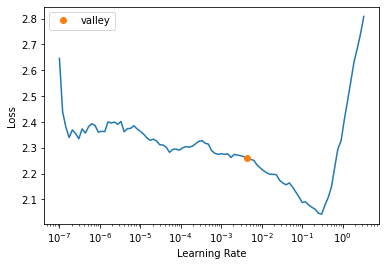

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_max=4e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.973019,0.955673,00:10
1,0.902211,0.891908,00:09
2,0.866371,0.860852,00:09
3,0.770071,0.853254,00:09
4,0.742999,0.853227,00:10


In [ ]:
learn.show_results()

,user,movie,gender,occupation,zipcode,rating,rating_pred
0,639,702,1,11,115,2,2.345249
1,587,749,2,14,126,2,2.869894
2,624,257,2,19,258,3,3.906189
3,682,763,2,15,426,4,2.985020
4,378,736,2,19,36,4,3.858619
5,934,209,2,5,208,1,3.506553
6,305,357,2,15,691,5,4.105171
7,552,237,2,14,516,4,3.361243
8,642,1151,1,19,726,5,3.543209


In [ ]:
show_doc(Learner.show_results)

---

### Learner.show_results

>      Learner.show_results (ds_idx=1, dl=None, max_n=9, shuffle=True, **kwargs)

Show some predictions on `ds_idx`-th dataset or `dl`

In [ ]:
learn.show_results(shuffle=False)

,user,movie,gender,occupation,zipcode,rating,rating_pred
0,939,1051,1,19,283,5,4.175147
1,381,1394,2,2,704,3,3.058837
2,303,829,2,19,131,2,2.028553
3,455,515,2,1,601,4,4.122187
4,479,144,2,4,437,4,3.961589
5,534,926,2,19,51,4,4.469633
6,311,66,2,20,529,4,3.965000
7,537,117,2,5,208,2,2.052593
8,87,182,2,1,628,4,3.842777
